In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from visual_behavior import database as db
import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp
import sys

from scipy import signal

from dro.modules import eye_tracking as et

from multiprocessing import Pool

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib notebook

In [3]:
def fix_path(path):
    if sys.platform == 'linux':
        return path.replace('\\','/')
    else:
        return path
    
def isint(string):
    try:
        int(string)
        return True
    except ValueError:
        return False

In [4]:
def get_experiment_folder(experiment_id):
    folder = fix_path(r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_pilot_analysis\visual_behavior_pilot_manuscript_resubmission")
    for fn in os.listdir(folder):
        if isint(fn[:9]) and int(fn[:9]) == int(experiment_id):
            break
        fn = None
    if fn is not None:
        return os.path.join(folder,fn)

In [5]:
# oeid = 713525580
# osid = 713171596

osid, oeid = 673445687, 673460976

In [6]:
ed = vbu.EyeTrackingData(int(osid))

In [7]:
eye_movie = vbu.Movie(ed.eye_movie_path)
behavior_movie = vbu.Movie(ed.behavior_movie_path)

In [8]:
eye_movie = vbu.Movie(ed.eye_movie_path)
behavior_movie = vbu.Movie(ed.behavior_movie_path)

In [9]:
eye_movie.frame_count

109636

In [10]:
behavior_movie.frame_count

109612

In [11]:
folder = get_experiment_folder(oeid)
timestamp_df = pd.read_hdf(os.path.join(folder,'timestamps.h5'))

In [12]:
len(timestamp_df['eye_tracking'].iloc[0])

109623

In [13]:
len(timestamp_df['behavior_monitoring'].iloc[0])

109639

In [14]:
diffs= np.diff(timestamp_df['eye_tracking'].iloc[0])

In [15]:
np.mean(diffs)

0.03333022568462535

<IPython.core.display.Javascript object>


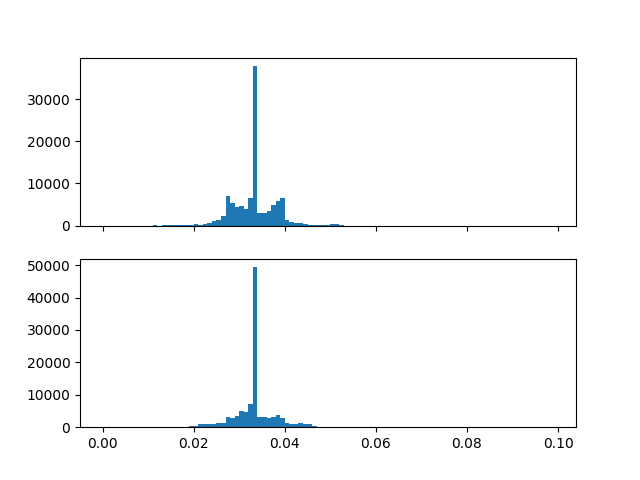

In [16]:
fig,ax = plt.subplots(2,1,sharex=True)
diffs_eye= np.diff(timestamp_df['eye_tracking'].iloc[0])
ax[0].hist(diffs_eye,bins=np.arange(0,0.1,0.001));

diffs_beh= np.diff(timestamp_df['behavior_monitoring'].iloc[0])
ax[1].hist(diffs_beh,bins=np.arange(0,0.1,0.001));

In [30]:
bm = timestamp_df['behavior_monitoring'].iloc[0]
np.sort(np.diff(bm))[:20]

array([0.00203, 0.0036 , 0.00368, 0.005  , 0.00764, 0.00777, 0.00801,
       0.00826, 0.00852, 0.00876, 0.0088 , 0.00887, 0.00889, 0.00905,
       0.00908, 0.00977, 0.00982, 0.01001, 0.01012, 0.01013])

In [34]:
em = eye_movie.timestamps_from_file
np.sort(np.diff(em))[:20]

array([0.01617687, 0.01641238, 0.01690902, 0.01693504, 0.01752512,
       0.01754944, 0.01792618, 0.01888019, 0.01914814, 0.01928296,
       0.01968317, 0.01969256, 0.01975997, 0.0197685 , 0.01984487,
       0.01990845, 0.02009319, 0.02016444, 0.02021394, 0.02022674])

In [35]:
eye_movie.timestamps_from_file[-1] - eye_movie.timestamps_from_file[0]

3654.600839498946

In [36]:
ts = timestamp_df['behavior_monitoring'].iloc[0]
ts[-1] - ts[0]

3654.54479

<IPython.core.display.Javascript object>


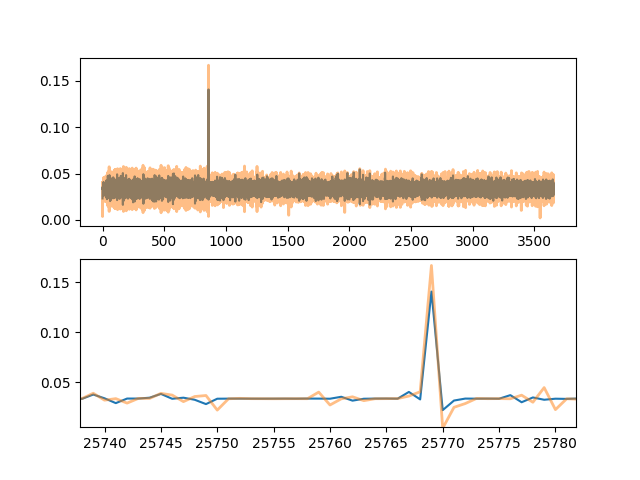

In [25]:
fig,ax=plt.subplots(2,1)

# et = timestamp_df['eye_tracking'].iloc[0]
et = timestamp_df['behavior_monitoring'].iloc[0]

ax[0].plot(eye_movie.timestamps_from_file[:-1] - eye_movie.timestamps_from_file[0], np.diff(eye_movie.timestamps_from_file))
ax[0].plot(et[:-1] - et[0], np.diff(et),alpha=0.5,linewidth=2)

ax[1].plot(np.diff(eye_movie.timestamps_from_file))
ax[1].plot(np.diff(et),alpha=0.5,linewidth=2)

<IPython.core.display.Javascript object>


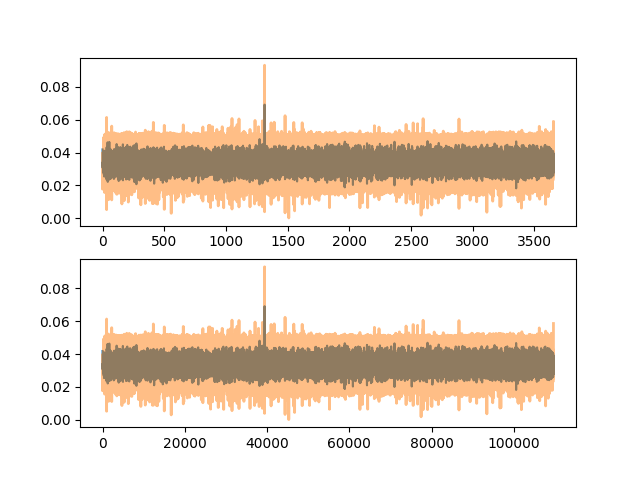

In [33]:
fig,ax=plt.subplots(2,1)

et = timestamp_df['eye_tracking'].iloc[0]
# et = timestamp_df['behavior_monitoring'].iloc[0]

ax[0].plot(behavior_movie.timestamps_from_file[:-1] - behavior_movie.timestamps_from_file[0], np.diff(behavior_movie.timestamps_from_file))
ax[0].plot(et[:-1] - et[0], np.diff(et),alpha=0.5,linewidth=2)

ax[1].plot(np.diff(behavior_movie.timestamps_from_file))
ax[1].plot(np.diff(et),alpha=0.5,linewidth=2)

<IPython.core.display.Javascript object>


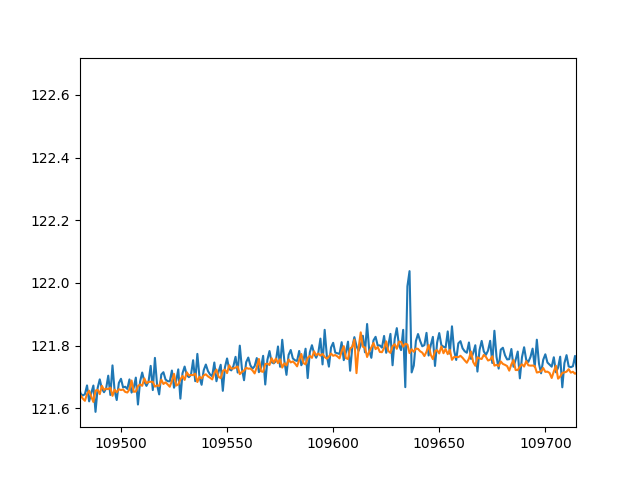

In [20]:
fig,ax=plt.subplots()
ax.plot(signal.correlate(np.diff(eye_movie.timestamps_from_file),diffs_beh))
ax.plot(signal.correlate(np.diff(eye_movie.timestamps_from_file),diffs_eye))

<IPython.core.display.Javascript object>


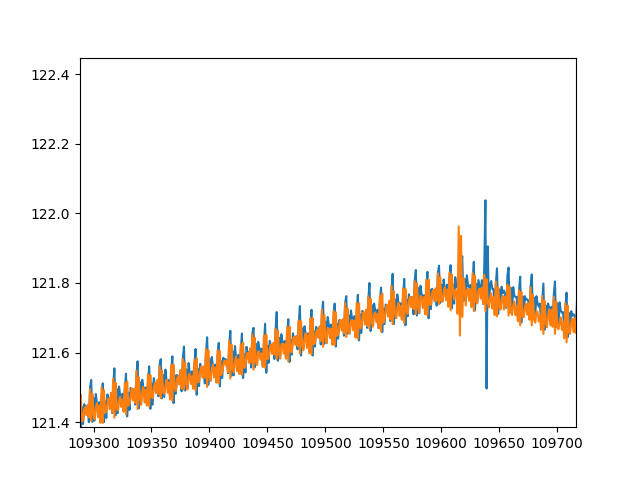

In [21]:
fig,ax=plt.subplots()
ax.plot(signal.correlate(np.diff(behavior_movie.timestamps_from_file),diffs_beh))
ax.plot(signal.correlate(np.diff(behavior_movie.timestamps_from_file),diffs_eye))

In [22]:
from scipy import stats

In [23]:
x = np.diff(eye_movie.timestamps_from_file)
y = diffs_eye
min_l = np.min((len(x),len(y)))
stats.pearsonr(x[:min_l],y[:min_l])

(0.001007998508797922, 0.738578287338516)

In [58]:
min_l

NameError: name 'min_l' is not defined